In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
import numpy as np

# Hyperparameters
latent_dim = 20
num_epochs = 2
batch_size = 64

# Load MNIST dataset
(train_images, _), (_, _) = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], -1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

# Batch and shuffle the dataset
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size, drop_remainder=True)  # Ensure all batches have the same size

# Generator Network
def build_generator():
    model = Sequential([
        Dense(256, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        Dense(784, activation='tanh')
    ])
    return model

# Discriminator Network
def build_discriminator():
    model = Sequential([
        Dense(512, input_shape=(784,)),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

generator = build_generator()
discriminator = build_discriminator()

# Discriminator Loss and Optimizer
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

# Combined Network
gan_input = tf.keras.Input(shape=(latent_dim,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Training Loop 
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progbar = tqdm(total=len(train_dataset), desc="Training Progress", ncols=75)

    for batch_images in train_dataset:
        # Adjust noise and batch size dynamically
        current_batch_size = batch_images.shape[0]
        noise = np.random.normal(0, 1, size=(current_batch_size, latent_dim))
        
        # Train Discriminator
        generated_images = generator.predict(noise)
        X_fake_and_real = np.concatenate([generated_images, batch_images])
        y1 = np.zeros((current_batch_size, 1))
        y2 = np.ones((current_batch_size, 1))
        labels = np.concatenate([y1, y2])
        d_loss = discriminator.train_on_batch(X_fake_and_real, labels)

        # Train Generator
        misleading_targets = np.ones((current_batch_size, 1))
        g_loss = gan.train_on_batch(noise, misleading_targets)

        progbar.update(1)  # Update progress bar
        progbar.set_postfix_str(f"D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}")

    progbar.close()


2024-04-11 19:47:53.487421: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 19:47:53.487524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 19:47:53.627397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/2


Training Progress:   0%|                           | 0/937 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


I0000 00:00:1712864886.570624      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")
Training Progress:   0%| | 1/937 [00:03<53:03,  3.40s/it, D Loss: 0.8038, G

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   0%| | 2/937 [00:03<23:43,  1.52s/it, D Loss: 0.9742, G

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   0%| | 3/937 [00:03<14:18,  1.09it/s, D Loss: 1.2410, G

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   0%| | 4/937 [00:04<09:54,  1.57it/s, D Loss: 1.6334, G

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   1%| | 5/937 [00:04<07:28,  2.08it/s, D Loss: 2.1109, G

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   1%| | 6/937 [00:04<06:01,  2.58it/s, D Loss: 2.6123, G

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   1%| | 7/937 [00:04<05:05,  3.04it/s, D Loss: 3.1043, G

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   1%| | 8/937 [00:04<04:28,  3.45it/s, D Loss: 3.5893, G

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   1%| | 9/937 [00:05<04:15,  3.64it/s, D Loss: 4.0252, G

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   1%| | 10/937 [00:05<03:57,  3.90it/s, D Loss: 4.4107, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   1%| | 11/937 [00:05<03:44,  4.13it/s, D Loss: 4.7524, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   1%| | 12/937 [00:05<03:35,  4.30it/s, D Loss: 5.0669, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   1%| | 13/937 [00:05<03:27,  4.46it/s, D Loss: 5.3404, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   1%| | 14/937 [00:06<03:24,  4.52it/s, D Loss: 5.5888, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   2%| | 15/937 [00:06<03:20,  4.59it/s, D Loss: 5.8086, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   2%| | 16/937 [00:06<03:17,  4.65it/s, D Loss: 6.0094, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   2%| | 17/937 [00:06<03:16,  4.68it/s, D Loss: 6.1907, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   2%| | 18/937 [00:06<03:14,  4.72it/s, D Loss: 6.3532, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   2%| | 19/937 [00:07<03:22,  4.53it/s, D Loss: 6.4995, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   2%| | 20/937 [00:07<04:28,  3.42it/s, D Loss: 6.6338, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   2%| | 21/937 [00:07<04:06,  3.72it/s, D Loss: 6.7555, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   2%| | 22/937 [00:08<03:52,  3.93it/s, D Loss: 6.8668, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   2%| | 23/937 [00:08<03:40,  4.15it/s, D Loss: 6.9702, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   3%| | 24/937 [00:08<03:31,  4.32it/s, D Loss: 7.0648, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   3%| | 25/937 [00:08<03:25,  4.44it/s, D Loss: 7.1526, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   3%| | 26/937 [00:08<03:21,  4.53it/s, D Loss: 7.2352, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:   3%| | 27/937 [00:09<03:18,  4.57it/s, D Loss: 7.3121, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   3%| | 28/937 [00:09<03:16,  4.62it/s, D Loss: 7.3832, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   3%| | 29/937 [00:09<03:15,  4.65it/s, D Loss: 7.4500, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   3%| | 30/937 [00:09<03:14,  4.66it/s, D Loss: 7.5124, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:   3%| | 31/937 [00:10<03:14,  4.65it/s, D Loss: 7.5704, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   3%| | 32/937 [00:10<03:13,  4.68it/s, D Loss: 7.6247, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   4%| | 33/937 [00:10<03:12,  4.70it/s, D Loss: 7.6752, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   4%| | 34/937 [00:10<03:13,  4.66it/s, D Loss: 7.7234, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   4%| | 35/937 [00:10<03:12,  4.69it/s, D Loss: 7.7685, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   4%| | 36/937 [00:11<03:12,  4.68it/s, D Loss: 7.8123, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   4%| | 37/937 [00:11<03:12,  4.67it/s, D Loss: 7.8530, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   4%| | 38/937 [00:11<03:12,  4.67it/s, D Loss: 7.8922, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   4%| | 39/937 [00:11<03:12,  4.66it/s, D Loss: 7.9292, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   4%| | 40/937 [00:11<03:12,  4.67it/s, D Loss: 7.9647, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   4%| | 41/937 [00:12<03:12,  4.66it/s, D Loss: 7.9991, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   4%| | 42/937 [00:12<03:11,  4.66it/s, D Loss: 8.0310, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   5%| | 43/937 [00:12<03:11,  4.66it/s, D Loss: 8.0620, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   5%| | 44/937 [00:12<03:12,  4.63it/s, D Loss: 8.0916, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   5%| | 45/937 [00:13<03:12,  4.63it/s, D Loss: 8.1194, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   5%| | 46/937 [00:13<03:12,  4.62it/s, D Loss: 8.1457, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   5%| | 47/937 [00:13<03:12,  4.63it/s, D Loss: 8.1715, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   5%| | 48/937 [00:13<03:12,  4.62it/s, D Loss: 8.1961, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   5%| | 49/937 [00:13<03:12,  4.62it/s, D Loss: 8.2198, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   5%| | 50/937 [00:14<03:13,  4.58it/s, D Loss: 8.2429, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   5%| | 51/937 [00:14<03:13,  4.58it/s, D Loss: 8.2649, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   6%| | 52/937 [00:14<03:12,  4.60it/s, D Loss: 8.2855, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   6%| | 53/937 [00:14<03:11,  4.63it/s, D Loss: 8.3059, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   6%| | 54/937 [00:14<03:11,  4.60it/s, D Loss: 8.3256, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:   6%| | 55/937 [00:15<03:17,  4.46it/s, D Loss: 8.3443, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   6%| | 56/937 [00:15<03:15,  4.50it/s, D Loss: 8.3628, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   6%| | 57/937 [00:15<03:14,  4.53it/s, D Loss: 8.3802, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   6%| | 58/937 [00:15<03:13,  4.54it/s, D Loss: 8.3969, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   6%| | 59/937 [00:16<03:13,  4.55it/s, D Loss: 8.4132, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   6%| | 60/937 [00:16<03:18,  4.42it/s, D Loss: 8.4287, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   7%| | 61/937 [00:16<03:23,  4.30it/s, D Loss: 8.4444, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   7%| | 62/937 [00:16<03:26,  4.24it/s, D Loss: 8.4596, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   7%| | 63/937 [00:17<03:26,  4.24it/s, D Loss: 8.4737, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   7%| | 64/937 [00:17<03:22,  4.32it/s, D Loss: 8.4880, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   7%| | 65/937 [00:17<03:17,  4.40it/s, D Loss: 8.5016, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   7%| | 66/937 [00:17<03:15,  4.46it/s, D Loss: 8.5149, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   7%| | 67/937 [00:17<03:13,  4.49it/s, D Loss: 8.5275, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   7%| | 68/937 [00:18<03:13,  4.49it/s, D Loss: 8.5398, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   7%| | 69/937 [00:18<03:11,  4.53it/s, D Loss: 8.5516, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   7%| | 70/937 [00:18<03:11,  4.54it/s, D Loss: 8.5635, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   8%| | 71/937 [00:18<03:10,  4.55it/s, D Loss: 8.5748, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   8%| | 72/937 [00:19<03:09,  4.55it/s, D Loss: 8.5856, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   8%| | 73/937 [00:19<03:09,  4.55it/s, D Loss: 8.5962, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   8%| | 74/937 [00:19<03:10,  4.53it/s, D Loss: 8.6063, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   8%| | 75/937 [00:19<03:10,  4.53it/s, D Loss: 8.6168, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   8%| | 76/937 [00:19<03:10,  4.53it/s, D Loss: 8.6265, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   8%| | 77/937 [00:20<03:10,  4.52it/s, D Loss: 8.6361, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   8%| | 78/937 [00:20<03:10,  4.51it/s, D Loss: 8.6457, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   8%| | 79/937 [00:20<03:10,  4.51it/s, D Loss: 8.6547, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   9%| | 80/937 [00:20<03:10,  4.50it/s, D Loss: 8.6635, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   9%| | 81/937 [00:21<03:10,  4.49it/s, D Loss: 8.6719, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   9%| | 82/937 [00:21<03:09,  4.50it/s, D Loss: 8.6803, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   9%| | 83/937 [00:21<03:08,  4.52it/s, D Loss: 8.6888, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   9%| | 84/937 [00:21<03:09,  4.50it/s, D Loss: 8.6969, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   9%| | 85/937 [00:21<03:09,  4.49it/s, D Loss: 8.7047, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   9%| | 86/937 [00:22<03:10,  4.46it/s, D Loss: 8.7124, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   9%| | 87/937 [00:22<03:10,  4.45it/s, D Loss: 8.7200, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:   9%| | 88/937 [00:22<03:10,  4.46it/s, D Loss: 8.7275, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:   9%| | 89/937 [00:22<03:09,  4.47it/s, D Loss: 8.7346, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  10%| | 90/937 [00:23<03:08,  4.49it/s, D Loss: 8.7415, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  10%| | 91/937 [00:23<03:08,  4.49it/s, D Loss: 8.7486, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  10%| | 92/937 [00:23<03:09,  4.47it/s, D Loss: 8.7551, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  10%| | 93/937 [00:23<03:08,  4.47it/s, D Loss: 8.7620, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  10%| | 94/937 [00:23<03:09,  4.45it/s, D Loss: 8.7685, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  10%| | 95/937 [00:24<03:10,  4.42it/s, D Loss: 8.7747, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  10%| | 96/937 [00:24<03:10,  4.42it/s, D Loss: 8.7808, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  10%| | 97/937 [00:24<03:10,  4.41it/s, D Loss: 8.7868, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  10%| | 98/937 [00:24<03:12,  4.37it/s, D Loss: 8.7930, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  11%| | 99/937 [00:25<03:18,  4.23it/s, D Loss: 8.7988, 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  11%| | 100/937 [00:25<03:15,  4.28it/s, D Loss: 8.8046,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  11%| | 101/937 [00:25<03:13,  4.31it/s, D Loss: 8.8100,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  11%| | 102/937 [00:25<03:12,  4.33it/s, D Loss: 8.8156,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  11%| | 103/937 [00:26<03:11,  4.36it/s, D Loss: 8.8211,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  11%| | 104/937 [00:26<03:10,  4.37it/s, D Loss: 8.8261,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  11%| | 105/937 [00:26<03:09,  4.38it/s, D Loss: 8.8313,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  11%| | 106/937 [00:26<03:09,  4.38it/s, D Loss: 8.8363,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  11%| | 107/937 [00:26<03:10,  4.36it/s, D Loss: 8.8410,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  12%| | 108/937 [00:27<03:09,  4.37it/s, D Loss: 8.8460,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  12%| | 109/937 [00:27<03:09,  4.37it/s, D Loss: 8.8510,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  12%| | 110/937 [00:27<03:09,  4.37it/s, D Loss: 8.8552,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  12%| | 111/937 [00:27<03:08,  4.37it/s, D Loss: 8.8599,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  12%| | 112/937 [00:28<03:09,  4.36it/s, D Loss: 8.8643,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  12%| | 113/937 [00:28<03:08,  4.37it/s, D Loss: 8.8689,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  12%| | 114/937 [00:28<03:08,  4.37it/s, D Loss: 8.8733,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  12%| | 115/937 [00:28<03:08,  4.37it/s, D Loss: 8.8775,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  12%| | 116/937 [00:28<03:08,  4.36it/s, D Loss: 8.8819,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  12%| | 117/937 [00:29<03:09,  4.33it/s, D Loss: 8.8861,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  13%|▏| 118/937 [00:29<03:11,  4.29it/s, D Loss: 8.8901,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  13%|▏| 119/937 [00:29<03:10,  4.30it/s, D Loss: 8.8943,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  13%|▏| 120/937 [00:29<03:09,  4.31it/s, D Loss: 8.8982,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  13%|▏| 121/937 [00:30<03:09,  4.30it/s, D Loss: 8.9025,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  13%|▏| 122/937 [00:30<03:09,  4.31it/s, D Loss: 8.9062,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  13%|▏| 123/937 [00:30<03:08,  4.32it/s, D Loss: 8.9097,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  13%|▏| 124/937 [00:30<03:08,  4.32it/s, D Loss: 8.9131,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  13%|▏| 125/937 [00:31<03:07,  4.33it/s, D Loss: 8.9167,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  13%|▏| 126/937 [00:31<03:06,  4.34it/s, D Loss: 8.9202,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  14%|▏| 127/937 [00:31<03:06,  4.35it/s, D Loss: 8.9237,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  14%|▏| 128/937 [00:31<03:05,  4.35it/s, D Loss: 8.9271,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  14%|▏| 129/937 [00:32<03:06,  4.33it/s, D Loss: 8.9305,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  14%|▏| 130/937 [00:32<03:06,  4.32it/s, D Loss: 8.9339,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  14%|▏| 131/937 [00:32<03:08,  4.27it/s, D Loss: 8.9372,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  14%|▏| 132/937 [00:32<03:08,  4.28it/s, D Loss: 8.9403,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  14%|▏| 133/937 [00:32<03:07,  4.28it/s, D Loss: 8.9435,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  14%|▏| 134/937 [00:33<03:07,  4.27it/s, D Loss: 8.9466,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  14%|▏| 135/937 [00:33<03:07,  4.27it/s, D Loss: 8.9497,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  15%|▏| 136/937 [00:33<03:06,  4.28it/s, D Loss: 8.9527,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  15%|▏| 137/937 [00:33<03:06,  4.28it/s, D Loss: 8.9556,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  15%|▏| 138/937 [00:34<03:07,  4.26it/s, D Loss: 8.9585,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  15%|▏| 139/937 [00:34<03:06,  4.28it/s, D Loss: 8.9615,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  15%|▏| 140/937 [00:34<03:06,  4.27it/s, D Loss: 8.9640,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  15%|▏| 141/937 [00:34<03:07,  4.25it/s, D Loss: 8.9668,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Training Progress:  15%|▏| 142/937 [00:35<03:17,  4.03it/s, D Loss: 8.9697,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  15%|▏| 143/937 [00:35<03:14,  4.08it/s, D Loss: 8.9726,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  15%|▏| 144/937 [00:35<03:12,  4.12it/s, D Loss: 8.9754,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  15%|▏| 145/937 [00:35<03:10,  4.16it/s, D Loss: 8.9782,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  16%|▏| 146/937 [00:36<03:09,  4.17it/s, D Loss: 8.9807,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  16%|▏| 147/937 [00:36<03:12,  4.10it/s, D Loss: 8.9834,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  16%|▏| 148/937 [00:36<03:18,  3.97it/s, D Loss: 8.9862,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  16%|▏| 149/937 [00:36<03:18,  3.97it/s, D Loss: 8.9888,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  16%|▏| 150/937 [00:37<03:15,  4.02it/s, D Loss: 8.9913,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  16%|▏| 151/937 [00:37<03:14,  4.05it/s, D Loss: 8.9936,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  16%|▏| 152/937 [00:37<03:12,  4.08it/s, D Loss: 8.9962,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  16%|▏| 153/937 [00:37<03:11,  4.10it/s, D Loss: 8.9987,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  16%|▏| 154/937 [00:38<03:11,  4.09it/s, D Loss: 9.0009,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  17%|▏| 155/937 [00:38<03:12,  4.07it/s, D Loss: 9.0032,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  17%|▏| 156/937 [00:38<03:20,  3.89it/s, D Loss: 9.0054,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  17%|▏| 157/937 [00:38<03:22,  3.84it/s, D Loss: 9.0076,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  17%|▏| 158/937 [00:39<03:22,  3.85it/s, D Loss: 9.0098,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  17%|▏| 159/937 [00:39<03:19,  3.90it/s, D Loss: 9.0120,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  17%|▏| 160/937 [00:39<03:15,  3.98it/s, D Loss: 9.0142,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  17%|▏| 161/937 [00:39<03:12,  4.04it/s, D Loss: 9.0167,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  17%|▏| 162/937 [00:40<03:11,  4.06it/s, D Loss: 9.0189,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  17%|▏| 163/937 [00:40<03:09,  4.08it/s, D Loss: 9.0211,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  18%|▏| 164/937 [00:40<03:08,  4.10it/s, D Loss: 9.0232,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  18%|▏| 165/937 [00:40<03:07,  4.11it/s, D Loss: 9.0253,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  18%|▏| 166/937 [00:41<03:06,  4.13it/s, D Loss: 9.0273,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  18%|▏| 167/937 [00:41<03:06,  4.14it/s, D Loss: 9.0294,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  18%|▏| 168/937 [00:41<03:05,  4.15it/s, D Loss: 9.0313,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  18%|▏| 169/937 [00:41<03:04,  4.16it/s, D Loss: 9.0333,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  18%|▏| 170/937 [00:41<03:05,  4.13it/s, D Loss: 9.0353,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  18%|▏| 171/937 [00:42<03:06,  4.12it/s, D Loss: 9.0373,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  18%|▏| 172/937 [00:42<03:04,  4.14it/s, D Loss: 9.0390,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  18%|▏| 173/937 [00:42<03:04,  4.14it/s, D Loss: 9.0408,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  19%|▏| 174/937 [00:42<03:03,  4.15it/s, D Loss: 9.0427,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  19%|▏| 175/937 [00:43<03:04,  4.13it/s, D Loss: 9.0444,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  19%|▏| 176/937 [00:43<03:04,  4.12it/s, D Loss: 9.0460,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  19%|▏| 177/937 [00:43<04:01,  3.14it/s, D Loss: 9.0477,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  19%|▏| 178/937 [00:44<03:45,  3.36it/s, D Loss: 9.0495,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  19%|▏| 179/937 [00:44<03:33,  3.55it/s, D Loss: 9.0513,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  19%|▏| 180/937 [00:44<03:25,  3.69it/s, D Loss: 9.0530,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  19%|▏| 181/937 [00:44<03:20,  3.77it/s, D Loss: 9.0547,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  19%|▏| 182/937 [00:45<03:20,  3.77it/s, D Loss: 9.0563,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  20%|▏| 183/937 [00:45<03:15,  3.86it/s, D Loss: 9.0579,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  20%|▏| 184/937 [00:45<03:11,  3.93it/s, D Loss: 9.0595,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  20%|▏| 185/937 [00:45<03:09,  3.97it/s, D Loss: 9.0611,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  20%|▏| 186/937 [00:46<03:08,  3.98it/s, D Loss: 9.0627,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  20%|▏| 187/937 [00:46<03:08,  3.98it/s, D Loss: 9.0643,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  20%|▏| 188/937 [00:46<03:16,  3.81it/s, D Loss: 9.0659,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  20%|▏| 189/937 [00:46<03:17,  3.79it/s, D Loss: 9.0674,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  20%|▏| 190/937 [00:47<03:14,  3.85it/s, D Loss: 9.0689,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  20%|▏| 191/937 [00:47<03:10,  3.91it/s, D Loss: 9.0705,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  20%|▏| 192/937 [00:47<03:08,  3.96it/s, D Loss: 9.0720,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  21%|▏| 193/937 [00:47<03:07,  3.97it/s, D Loss: 9.0735,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  21%|▏| 194/937 [00:48<03:07,  3.96it/s, D Loss: 9.0747,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  21%|▏| 195/937 [00:48<03:07,  3.96it/s, D Loss: 9.0760,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  21%|▏| 196/937 [00:48<03:06,  3.98it/s, D Loss: 9.0774,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  21%|▏| 197/937 [00:48<03:06,  3.97it/s, D Loss: 9.0788,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  21%|▏| 198/937 [00:49<03:05,  3.97it/s, D Loss: 9.0802,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  21%|▏| 199/937 [00:49<03:04,  3.99it/s, D Loss: 9.0816,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  21%|▏| 200/937 [00:49<03:04,  3.99it/s, D Loss: 9.0831,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  21%|▏| 201/937 [00:49<03:04,  3.99it/s, D Loss: 9.0844,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  22%|▏| 202/937 [00:50<03:03,  4.00it/s, D Loss: 9.0857,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  22%|▏| 203/937 [00:50<03:03,  3.99it/s, D Loss: 9.0873,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  22%|▏| 204/937 [00:50<03:03,  4.00it/s, D Loss: 9.0887,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  22%|▏| 205/937 [00:50<03:02,  4.00it/s, D Loss: 9.0901,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  22%|▏| 206/937 [00:51<03:03,  3.99it/s, D Loss: 9.0914,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  22%|▏| 207/937 [00:51<03:02,  4.00it/s, D Loss: 9.0927,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  22%|▏| 208/937 [00:51<03:01,  4.01it/s, D Loss: 9.0940,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  22%|▏| 209/937 [00:51<03:01,  4.00it/s, D Loss: 9.0952,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  22%|▏| 210/937 [00:52<03:01,  4.00it/s, D Loss: 9.0964,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  23%|▏| 211/937 [00:52<03:01,  4.00it/s, D Loss: 9.0977,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  23%|▏| 212/937 [00:52<03:01,  3.99it/s, D Loss: 9.0989,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  23%|▏| 213/937 [00:53<03:07,  3.86it/s, D Loss: 9.1002,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  23%|▏| 214/937 [00:53<03:05,  3.90it/s, D Loss: 9.1015,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  23%|▏| 215/937 [00:53<03:03,  3.93it/s, D Loss: 9.1027,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  23%|▏| 216/937 [00:53<03:03,  3.94it/s, D Loss: 9.1037,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  23%|▏| 217/937 [00:54<03:02,  3.94it/s, D Loss: 9.1049,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  23%|▏| 218/937 [00:54<03:02,  3.94it/s, D Loss: 9.1061,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  23%|▏| 219/937 [00:54<03:01,  3.96it/s, D Loss: 9.1072,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  23%|▏| 220/937 [00:54<03:00,  3.96it/s, D Loss: 9.1085,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  24%|▏| 221/937 [00:55<03:04,  3.88it/s, D Loss: 9.1096,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  24%|▏| 222/937 [00:55<03:05,  3.85it/s, D Loss: 9.1108,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  24%|▏| 223/937 [00:55<03:03,  3.89it/s, D Loss: 9.1120,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  24%|▏| 224/937 [00:55<03:02,  3.90it/s, D Loss: 9.1131,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  24%|▏| 225/937 [00:56<03:01,  3.92it/s, D Loss: 9.1142,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  24%|▏| 226/937 [00:56<03:01,  3.91it/s, D Loss: 9.1152,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  24%|▏| 227/937 [00:56<03:00,  3.94it/s, D Loss: 9.1162,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  24%|▏| 228/937 [00:56<02:59,  3.94it/s, D Loss: 9.1173,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  24%|▏| 229/937 [00:57<02:59,  3.94it/s, D Loss: 9.1184,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  25%|▏| 230/937 [00:57<02:59,  3.93it/s, D Loss: 9.1194,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  25%|▏| 231/937 [00:57<02:59,  3.94it/s, D Loss: 9.1205,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  25%|▏| 232/937 [00:57<02:59,  3.93it/s, D Loss: 9.1215,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  25%|▏| 233/937 [00:58<02:59,  3.93it/s, D Loss: 9.1226,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  25%|▏| 234/937 [00:58<02:59,  3.92it/s, D Loss: 9.1235,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  25%|▎| 235/937 [00:58<02:58,  3.93it/s, D Loss: 9.1244,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  25%|▎| 236/937 [00:58<02:58,  3.92it/s, D Loss: 9.1255,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  25%|▎| 237/937 [00:59<02:58,  3.92it/s, D Loss: 9.1263,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  25%|▎| 238/937 [00:59<02:58,  3.92it/s, D Loss: 9.1273,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  26%|▎| 239/937 [00:59<02:57,  3.93it/s, D Loss: 9.1283,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  26%|▎| 240/937 [00:59<02:56,  3.94it/s, D Loss: 9.1293,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  26%|▎| 241/937 [01:00<02:57,  3.93it/s, D Loss: 9.1304,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  26%|▎| 242/937 [01:00<02:57,  3.91it/s, D Loss: 9.1313,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  26%|▎| 243/937 [01:00<02:57,  3.92it/s, D Loss: 9.1323,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  26%|▎| 244/937 [01:00<02:57,  3.91it/s, D Loss: 9.1331,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  26%|▎| 245/937 [01:01<02:57,  3.90it/s, D Loss: 9.1341,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  26%|▎| 246/937 [01:01<02:57,  3.90it/s, D Loss: 9.1350,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  26%|▎| 247/937 [01:01<02:56,  3.91it/s, D Loss: 9.1359,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  26%|▎| 248/937 [01:01<02:57,  3.89it/s, D Loss: 9.1368,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  27%|▎| 249/937 [01:02<02:56,  3.89it/s, D Loss: 9.1377,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  27%|▎| 250/937 [01:02<02:56,  3.89it/s, D Loss: 9.1387,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  27%|▎| 251/937 [01:02<02:56,  3.90it/s, D Loss: 9.1396,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  27%|▎| 252/937 [01:02<02:55,  3.90it/s, D Loss: 9.1406,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  27%|▎| 253/937 [01:03<02:55,  3.89it/s, D Loss: 9.1414,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  27%|▎| 254/937 [01:03<02:56,  3.88it/s, D Loss: 9.1423,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  27%|▎| 255/937 [01:03<02:55,  3.88it/s, D Loss: 9.1431,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  27%|▎| 256/937 [01:04<02:55,  3.87it/s, D Loss: 9.1440,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  27%|▎| 257/937 [01:04<02:56,  3.84it/s, D Loss: 9.1449,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  28%|▎| 258/937 [01:04<02:56,  3.85it/s, D Loss: 9.1457,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  28%|▎| 259/937 [01:04<02:56,  3.84it/s, D Loss: 9.1466,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  28%|▎| 260/937 [01:05<03:02,  3.71it/s, D Loss: 9.1474,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  28%|▎| 261/937 [01:05<03:00,  3.74it/s, D Loss: 9.1482,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  28%|▎| 262/937 [01:05<02:58,  3.78it/s, D Loss: 9.1489,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  28%|▎| 263/937 [01:05<02:57,  3.79it/s, D Loss: 9.1497,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  28%|▎| 264/937 [01:06<02:57,  3.79it/s, D Loss: 9.1506,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  28%|▎| 265/937 [01:06<02:57,  3.78it/s, D Loss: 9.1513,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  28%|▎| 266/937 [01:06<02:57,  3.77it/s, D Loss: 9.1520,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  28%|▎| 267/937 [01:06<02:57,  3.78it/s, D Loss: 9.1528,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  29%|▎| 268/937 [01:07<02:56,  3.79it/s, D Loss: 9.1536,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  29%|▎| 269/937 [01:07<02:56,  3.78it/s, D Loss: 9.1544,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  29%|▎| 270/937 [01:07<02:59,  3.71it/s, D Loss: 9.1552,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  29%|▎| 271/937 [01:08<03:00,  3.70it/s, D Loss: 9.1559,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  29%|▎| 272/937 [01:08<02:59,  3.71it/s, D Loss: 9.1567,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  29%|▎| 273/937 [01:08<02:57,  3.74it/s, D Loss: 9.1575,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  29%|▎| 274/937 [01:08<02:56,  3.76it/s, D Loss: 9.1583,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  29%|▎| 275/937 [01:09<02:55,  3.77it/s, D Loss: 9.1591,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  29%|▎| 276/937 [01:09<02:55,  3.77it/s, D Loss: 9.1598,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  30%|▎| 277/937 [01:09<02:59,  3.68it/s, D Loss: 9.1605,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  30%|▎| 278/937 [01:09<03:08,  3.50it/s, D Loss: 9.1611,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  30%|▎| 279/937 [01:10<03:05,  3.55it/s, D Loss: 9.1618,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  30%|▎| 280/937 [01:10<03:02,  3.60it/s, D Loss: 9.1625,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  30%|▎| 281/937 [01:10<02:59,  3.65it/s, D Loss: 9.1632,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  30%|▎| 282/937 [01:10<02:57,  3.69it/s, D Loss: 9.1639,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  30%|▎| 283/937 [01:11<02:57,  3.69it/s, D Loss: 9.1646,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  30%|▎| 284/937 [01:11<02:56,  3.69it/s, D Loss: 9.1653,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  30%|▎| 285/937 [01:11<02:56,  3.70it/s, D Loss: 9.1659,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  31%|▎| 286/937 [01:12<02:55,  3.71it/s, D Loss: 9.1666,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  31%|▎| 287/937 [01:12<02:55,  3.71it/s, D Loss: 9.1673,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  31%|▎| 288/937 [01:12<02:54,  3.73it/s, D Loss: 9.1680,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  31%|▎| 289/937 [01:12<02:53,  3.73it/s, D Loss: 9.1686,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  31%|▎| 290/937 [01:13<02:53,  3.72it/s, D Loss: 9.1693,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  31%|▎| 291/937 [01:13<02:53,  3.73it/s, D Loss: 9.1699,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  31%|▎| 292/937 [01:13<02:52,  3.74it/s, D Loss: 9.1705,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  31%|▎| 293/937 [01:13<02:51,  3.76it/s, D Loss: 9.1712,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  31%|▎| 294/937 [01:14<02:52,  3.74it/s, D Loss: 9.1718,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  31%|▎| 295/937 [01:14<02:52,  3.72it/s, D Loss: 9.1724,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  32%|▎| 296/937 [01:14<02:53,  3.70it/s, D Loss: 9.1730,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  32%|▎| 297/937 [01:15<02:55,  3.65it/s, D Loss: 9.1738,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  32%|▎| 298/937 [01:15<02:56,  3.62it/s, D Loss: 9.1745,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  32%|▎| 299/937 [01:15<02:54,  3.66it/s, D Loss: 9.1752,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  32%|▎| 300/937 [01:15<02:53,  3.68it/s, D Loss: 9.1758,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  32%|▎| 301/937 [01:16<02:52,  3.68it/s, D Loss: 9.1764,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  32%|▎| 302/937 [01:16<02:52,  3.67it/s, D Loss: 9.1770,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  32%|▎| 303/937 [01:16<02:52,  3.68it/s, D Loss: 9.1777,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  32%|▎| 304/937 [01:16<02:56,  3.58it/s, D Loss: 9.1782,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  33%|▎| 305/937 [01:17<02:57,  3.57it/s, D Loss: 9.1789,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  33%|▎| 306/937 [01:17<02:56,  3.58it/s, D Loss: 9.1794,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  33%|▎| 307/937 [01:17<02:54,  3.61it/s, D Loss: 9.1800,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  33%|▎| 308/937 [01:18<02:54,  3.61it/s, D Loss: 9.1807,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  33%|▎| 309/937 [01:18<02:52,  3.63it/s, D Loss: 9.1812,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  33%|▎| 310/937 [01:18<02:51,  3.66it/s, D Loss: 9.1818,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  33%|▎| 311/937 [01:18<02:49,  3.68it/s, D Loss: 9.1823,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  33%|▎| 312/937 [01:19<02:49,  3.68it/s, D Loss: 9.1829,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  33%|▎| 313/937 [01:19<02:49,  3.68it/s, D Loss: 9.1835,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  34%|▎| 314/937 [01:19<02:49,  3.67it/s, D Loss: 9.1841,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  34%|▎| 315/937 [01:19<02:49,  3.66it/s, D Loss: 9.1847,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  34%|▎| 316/937 [01:20<02:49,  3.67it/s, D Loss: 9.1853,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  34%|▎| 317/937 [01:20<02:49,  3.66it/s, D Loss: 9.1858,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  34%|▎| 318/937 [01:20<02:48,  3.68it/s, D Loss: 9.1863,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  34%|▎| 319/937 [01:21<02:48,  3.68it/s, D Loss: 9.1870,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  34%|▎| 320/937 [01:21<02:48,  3.66it/s, D Loss: 9.1876,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  34%|▎| 321/937 [01:21<02:48,  3.66it/s, D Loss: 9.1881,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  34%|▎| 322/937 [01:21<02:48,  3.66it/s, D Loss: 9.1888,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  34%|▎| 323/937 [01:22<02:47,  3.66it/s, D Loss: 9.1893,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  35%|▎| 324/937 [01:22<02:47,  3.67it/s, D Loss: 9.1899,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  35%|▎| 325/937 [01:22<02:46,  3.68it/s, D Loss: 9.1904,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  35%|▎| 326/937 [01:22<02:46,  3.67it/s, D Loss: 9.1910,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  35%|▎| 327/937 [01:23<02:45,  3.68it/s, D Loss: 9.1915,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  35%|▎| 328/937 [01:23<02:46,  3.66it/s, D Loss: 9.1921,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  35%|▎| 329/937 [01:23<02:46,  3.66it/s, D Loss: 9.1926,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  35%|▎| 330/937 [01:24<02:46,  3.64it/s, D Loss: 9.1931,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  35%|▎| 331/937 [01:24<02:46,  3.63it/s, D Loss: 9.1935,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  35%|▎| 332/937 [01:24<02:46,  3.62it/s, D Loss: 9.1941,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  36%|▎| 333/937 [01:24<02:46,  3.62it/s, D Loss: 9.1946,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  36%|▎| 334/937 [01:25<02:49,  3.55it/s, D Loss: 9.1951,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  36%|▎| 335/937 [01:25<02:48,  3.58it/s, D Loss: 9.1956,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  36%|▎| 336/937 [01:25<02:46,  3.60it/s, D Loss: 9.1961,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  36%|▎| 337/937 [01:26<02:46,  3.60it/s, D Loss: 9.1967,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  36%|▎| 338/937 [01:26<02:47,  3.57it/s, D Loss: 9.1972,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  36%|▎| 339/937 [01:26<02:46,  3.59it/s, D Loss: 9.1977,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  36%|▎| 340/937 [01:26<02:46,  3.59it/s, D Loss: 9.1981,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  36%|▎| 341/937 [01:27<02:46,  3.58it/s, D Loss: 9.1987,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  36%|▎| 342/937 [01:27<02:47,  3.56it/s, D Loss: 9.1992,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  37%|▎| 343/937 [01:27<02:46,  3.57it/s, D Loss: 9.1996,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  37%|▎| 344/937 [01:27<02:46,  3.57it/s, D Loss: 9.2001,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  37%|▎| 345/937 [01:28<02:45,  3.58it/s, D Loss: 9.2005,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  37%|▎| 346/937 [01:28<02:45,  3.57it/s, D Loss: 9.2010,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  37%|▎| 347/937 [01:28<02:45,  3.57it/s, D Loss: 9.2014,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  37%|▎| 348/937 [01:29<02:45,  3.57it/s, D Loss: 9.2019,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  37%|▎| 349/937 [01:29<02:44,  3.58it/s, D Loss: 9.2025,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  37%|▎| 350/937 [01:29<02:44,  3.58it/s, D Loss: 9.2029,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  37%|▎| 351/937 [01:29<02:44,  3.57it/s, D Loss: 9.2034,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  38%|▍| 352/937 [01:30<02:43,  3.57it/s, D Loss: 9.2039,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  38%|▍| 353/937 [01:30<02:44,  3.55it/s, D Loss: 9.2043,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  38%|▍| 354/937 [01:30<02:43,  3.57it/s, D Loss: 9.2048,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  38%|▍| 355/937 [01:31<02:43,  3.56it/s, D Loss: 9.2053,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  38%|▍| 356/937 [01:31<02:44,  3.54it/s, D Loss: 9.2057,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  38%|▍| 357/937 [01:31<02:43,  3.55it/s, D Loss: 9.2062,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  38%|▍| 358/937 [01:31<02:43,  3.54it/s, D Loss: 9.2066,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  38%|▍| 359/937 [01:32<02:42,  3.55it/s, D Loss: 9.2070,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  38%|▍| 360/937 [01:32<02:43,  3.52it/s, D Loss: 9.2074,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  39%|▍| 361/937 [01:32<02:43,  3.53it/s, D Loss: 9.2079,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  39%|▍| 362/937 [01:33<02:43,  3.52it/s, D Loss: 9.2082,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  39%|▍| 363/937 [01:33<02:42,  3.52it/s, D Loss: 9.2086,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  39%|▍| 364/937 [01:33<02:41,  3.55it/s, D Loss: 9.2089,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  39%|▍| 365/937 [01:33<02:41,  3.54it/s, D Loss: 9.2093,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  39%|▍| 366/937 [01:34<02:41,  3.54it/s, D Loss: 9.2097,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  39%|▍| 367/937 [01:34<02:40,  3.56it/s, D Loss: 9.2101,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  39%|▍| 368/937 [01:34<02:39,  3.56it/s, D Loss: 9.2105,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  39%|▍| 369/937 [01:35<03:38,  2.60it/s, D Loss: 9.2109,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  39%|▍| 370/937 [01:35<03:19,  2.84it/s, D Loss: 9.2114,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  40%|▍| 371/937 [01:35<03:07,  3.01it/s, D Loss: 9.2119,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  40%|▍| 372/937 [01:36<02:59,  3.15it/s, D Loss: 9.2123,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  40%|▍| 373/937 [01:36<02:54,  3.23it/s, D Loss: 9.2128,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  40%|▍| 374/937 [01:36<02:49,  3.32it/s, D Loss: 9.2132,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  40%|▍| 375/937 [01:37<02:47,  3.36it/s, D Loss: 9.2137,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  40%|▍| 376/937 [01:37<02:44,  3.41it/s, D Loss: 9.2141,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  40%|▍| 377/937 [01:37<02:43,  3.43it/s, D Loss: 9.2144,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  40%|▍| 378/937 [01:37<02:41,  3.45it/s, D Loss: 9.2148,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  40%|▍| 379/937 [01:38<02:40,  3.48it/s, D Loss: 9.2154,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  41%|▍| 380/937 [01:38<02:39,  3.48it/s, D Loss: 9.2158,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  41%|▍| 381/937 [01:38<02:40,  3.47it/s, D Loss: 9.2161,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  41%|▍| 382/937 [01:39<02:40,  3.46it/s, D Loss: 9.2164,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  41%|▍| 383/937 [01:39<02:39,  3.47it/s, D Loss: 9.2169,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  41%|▍| 384/937 [01:39<02:38,  3.48it/s, D Loss: 9.2173,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  41%|▍| 385/937 [01:39<02:38,  3.48it/s, D Loss: 9.2177,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  41%|▍| 386/937 [01:40<02:39,  3.46it/s, D Loss: 9.2181,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  41%|▍| 387/937 [01:40<02:39,  3.45it/s, D Loss: 9.2185,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  41%|▍| 388/937 [01:40<02:44,  3.34it/s, D Loss: 9.2188,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  42%|▍| 389/937 [01:41<02:45,  3.31it/s, D Loss: 9.2192,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  42%|▍| 390/937 [01:41<02:43,  3.35it/s, D Loss: 9.2197,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  42%|▍| 391/937 [01:41<02:42,  3.37it/s, D Loss: 9.2200,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  42%|▍| 392/937 [01:42<02:40,  3.40it/s, D Loss: 9.2203,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  42%|▍| 393/937 [01:42<02:39,  3.42it/s, D Loss: 9.2206,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  42%|▍| 394/937 [01:42<02:38,  3.43it/s, D Loss: 9.2210,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  42%|▍| 395/937 [01:42<02:38,  3.43it/s, D Loss: 9.2214,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  42%|▍| 396/937 [01:43<02:37,  3.43it/s, D Loss: 9.2218,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  42%|▍| 397/937 [01:43<02:37,  3.44it/s, D Loss: 9.2222,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  42%|▍| 398/937 [01:43<02:36,  3.45it/s, D Loss: 9.2225,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  43%|▍| 399/937 [01:44<02:36,  3.44it/s, D Loss: 9.2229,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  43%|▍| 400/937 [01:44<02:36,  3.44it/s, D Loss: 9.2233,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  43%|▍| 401/937 [01:44<02:35,  3.45it/s, D Loss: 9.2236,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  43%|▍| 402/937 [01:44<02:36,  3.43it/s, D Loss: 9.2240,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  43%|▍| 403/937 [01:45<02:38,  3.37it/s, D Loss: 9.2244,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  43%|▍| 404/937 [01:45<02:37,  3.38it/s, D Loss: 9.2247,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  43%|▍| 405/937 [01:45<02:37,  3.38it/s, D Loss: 9.2252,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  43%|▍| 406/937 [01:46<02:36,  3.40it/s, D Loss: 9.2255,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  43%|▍| 407/937 [01:46<02:35,  3.40it/s, D Loss: 9.2258,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  44%|▍| 408/937 [01:46<02:35,  3.41it/s, D Loss: 9.2262,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  44%|▍| 409/937 [01:47<02:34,  3.41it/s, D Loss: 9.2265,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  44%|▍| 410/937 [01:47<02:39,  3.31it/s, D Loss: 9.2269,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  44%|▍| 411/937 [01:47<02:40,  3.27it/s, D Loss: 9.2272,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  44%|▍| 412/937 [01:47<02:40,  3.28it/s, D Loss: 9.2275,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  44%|▍| 413/937 [01:48<02:38,  3.30it/s, D Loss: 9.2279,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  44%|▍| 414/937 [01:48<02:37,  3.31it/s, D Loss: 9.2282,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  44%|▍| 415/937 [01:48<02:36,  3.33it/s, D Loss: 9.2285,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  44%|▍| 416/937 [01:49<02:36,  3.33it/s, D Loss: 9.2289,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  45%|▍| 417/937 [01:49<02:35,  3.33it/s, D Loss: 9.2292,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  45%|▍| 418/937 [01:49<02:34,  3.36it/s, D Loss: 9.2295,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  45%|▍| 419/937 [01:50<02:33,  3.38it/s, D Loss: 9.2298,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  45%|▍| 420/937 [01:50<02:32,  3.40it/s, D Loss: 9.2301,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  45%|▍| 421/937 [01:50<02:31,  3.40it/s, D Loss: 9.2304,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  45%|▍| 422/937 [01:50<02:31,  3.41it/s, D Loss: 9.2307,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  45%|▍| 423/937 [01:51<02:31,  3.39it/s, D Loss: 9.2310,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  45%|▍| 424/937 [01:51<02:31,  3.39it/s, D Loss: 9.2313,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  45%|▍| 425/937 [01:51<02:30,  3.41it/s, D Loss: 9.2316,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  45%|▍| 426/937 [01:52<02:30,  3.40it/s, D Loss: 9.2319,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  46%|▍| 427/937 [01:52<02:31,  3.37it/s, D Loss: 9.2321,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  46%|▍| 428/937 [01:52<02:30,  3.38it/s, D Loss: 9.2323,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  46%|▍| 429/937 [01:52<02:32,  3.34it/s, D Loss: 9.2327,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  46%|▍| 430/937 [01:53<02:34,  3.29it/s, D Loss: 9.2330,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  46%|▍| 431/937 [01:53<02:31,  3.33it/s, D Loss: 9.2333,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  46%|▍| 432/937 [01:53<02:30,  3.36it/s, D Loss: 9.2336,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  46%|▍| 433/937 [01:54<02:29,  3.37it/s, D Loss: 9.2339,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  46%|▍| 434/937 [01:54<02:29,  3.37it/s, D Loss: 9.2342,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  46%|▍| 435/937 [01:54<02:29,  3.36it/s, D Loss: 9.2345,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  47%|▍| 436/937 [01:55<02:32,  3.29it/s, D Loss: 9.2348,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  47%|▍| 437/937 [01:55<02:30,  3.32it/s, D Loss: 9.2350,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  47%|▍| 438/937 [01:55<02:28,  3.35it/s, D Loss: 9.2353,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  47%|▍| 439/937 [01:55<02:28,  3.35it/s, D Loss: 9.2356,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  47%|▍| 440/937 [01:56<02:28,  3.35it/s, D Loss: 9.2358,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  47%|▍| 441/937 [01:56<02:28,  3.34it/s, D Loss: 9.2360,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  47%|▍| 442/937 [01:56<02:27,  3.36it/s, D Loss: 9.2363,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  47%|▍| 443/937 [01:57<02:26,  3.37it/s, D Loss: 9.2366,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  47%|▍| 444/937 [01:57<02:26,  3.37it/s, D Loss: 9.2369,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  47%|▍| 445/937 [01:57<02:25,  3.37it/s, D Loss: 9.2372,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  48%|▍| 446/937 [01:58<02:25,  3.37it/s, D Loss: 9.2374,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  48%|▍| 447/937 [01:58<02:25,  3.36it/s, D Loss: 9.2377,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  48%|▍| 448/937 [01:58<02:25,  3.37it/s, D Loss: 9.2379,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  48%|▍| 449/937 [01:58<02:26,  3.34it/s, D Loss: 9.2382,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  48%|▍| 450/937 [01:59<02:26,  3.32it/s, D Loss: 9.2384,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  48%|▍| 451/937 [01:59<02:25,  3.33it/s, D Loss: 9.2387,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  48%|▍| 452/937 [01:59<02:25,  3.33it/s, D Loss: 9.2390,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  48%|▍| 453/937 [02:00<02:26,  3.31it/s, D Loss: 9.2392,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  48%|▍| 454/937 [02:00<02:25,  3.32it/s, D Loss: 9.2395,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  49%|▍| 455/937 [02:00<02:24,  3.33it/s, D Loss: 9.2397,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  49%|▍| 456/937 [02:01<02:24,  3.33it/s, D Loss: 9.2399,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  49%|▍| 457/937 [02:01<02:24,  3.32it/s, D Loss: 9.2402,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  49%|▍| 458/937 [02:01<02:24,  3.32it/s, D Loss: 9.2405,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  49%|▍| 459/937 [02:01<02:24,  3.30it/s, D Loss: 9.2407,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  49%|▍| 460/937 [02:02<02:24,  3.30it/s, D Loss: 9.2410,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  49%|▍| 461/937 [02:02<02:23,  3.31it/s, D Loss: 9.2412,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  49%|▍| 462/937 [02:02<02:23,  3.31it/s, D Loss: 9.2414,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  49%|▍| 463/937 [02:03<02:23,  3.31it/s, D Loss: 9.2417,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  50%|▍| 464/937 [02:03<02:23,  3.29it/s, D Loss: 9.2420,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  50%|▍| 465/937 [02:03<02:23,  3.28it/s, D Loss: 9.2422,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  50%|▍| 466/937 [02:04<02:23,  3.29it/s, D Loss: 9.2424,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  50%|▍| 467/937 [02:04<02:23,  3.27it/s, D Loss: 9.2426,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  50%|▍| 468/937 [02:04<02:23,  3.27it/s, D Loss: 9.2428,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  50%|▌| 469/937 [02:05<02:24,  3.24it/s, D Loss: 9.2431,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  50%|▌| 470/937 [02:05<02:26,  3.18it/s, D Loss: 9.2434,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  50%|▌| 471/937 [02:05<02:25,  3.20it/s, D Loss: 9.2436,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  50%|▌| 472/937 [02:05<02:24,  3.22it/s, D Loss: 9.2439,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  50%|▌| 473/937 [02:06<02:23,  3.23it/s, D Loss: 9.2441,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  51%|▌| 474/937 [02:06<02:23,  3.24it/s, D Loss: 9.2444,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  51%|▌| 475/937 [02:06<02:21,  3.26it/s, D Loss: 9.2446,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  51%|▌| 476/937 [02:07<02:21,  3.26it/s, D Loss: 9.2448,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  51%|▌| 477/937 [02:07<02:21,  3.25it/s, D Loss: 9.2452,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  51%|▌| 478/937 [02:07<02:20,  3.26it/s, D Loss: 9.2454,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  51%|▌| 479/937 [02:08<02:22,  3.22it/s, D Loss: 9.2456,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  51%|▌| 480/937 [02:08<02:25,  3.15it/s, D Loss: 9.2458,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  51%|▌| 481/937 [02:08<02:24,  3.16it/s, D Loss: 9.2460,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  51%|▌| 482/937 [02:09<02:23,  3.18it/s, D Loss: 9.2463,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  52%|▌| 483/937 [02:09<02:22,  3.19it/s, D Loss: 9.2465,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  52%|▌| 484/937 [02:09<02:21,  3.20it/s, D Loss: 9.2467,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  52%|▌| 485/937 [02:10<02:21,  3.20it/s, D Loss: 9.2469,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  52%|▌| 486/937 [02:10<02:20,  3.21it/s, D Loss: 9.2471,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  52%|▌| 487/937 [02:10<02:19,  3.22it/s, D Loss: 9.2474,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  52%|▌| 488/937 [02:10<02:18,  3.24it/s, D Loss: 9.2476,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  52%|▌| 489/937 [02:11<02:19,  3.22it/s, D Loss: 9.2478,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  52%|▌| 490/937 [02:11<02:18,  3.23it/s, D Loss: 9.2480,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  52%|▌| 491/937 [02:11<02:22,  3.12it/s, D Loss: 9.2483,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  53%|▌| 492/937 [02:12<02:22,  3.12it/s, D Loss: 9.2486,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  53%|▌| 493/937 [02:12<02:21,  3.13it/s, D Loss: 9.2489,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  53%|▌| 494/937 [02:12<02:20,  3.16it/s, D Loss: 9.2492,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  53%|▌| 495/937 [02:13<02:19,  3.17it/s, D Loss: 9.2495,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  53%|▌| 496/937 [02:13<02:18,  3.19it/s, D Loss: 9.2497,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  53%|▌| 497/937 [02:13<02:17,  3.21it/s, D Loss: 9.2499,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  53%|▌| 498/937 [02:14<02:16,  3.22it/s, D Loss: 9.2502,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  53%|▌| 499/937 [02:14<02:16,  3.21it/s, D Loss: 9.2505,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  53%|▌| 500/937 [02:14<02:17,  3.19it/s, D Loss: 9.2507,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  53%|▌| 501/937 [02:15<02:19,  3.13it/s, D Loss: 9.2510,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  54%|▌| 502/937 [02:15<02:18,  3.14it/s, D Loss: 9.2511,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  54%|▌| 503/937 [02:15<02:16,  3.18it/s, D Loss: 9.2514,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  54%|▌| 504/937 [02:15<02:15,  3.19it/s, D Loss: 9.2516,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  54%|▌| 505/937 [02:16<02:15,  3.20it/s, D Loss: 9.2518,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  54%|▌| 506/937 [02:16<02:14,  3.21it/s, D Loss: 9.2521,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  54%|▌| 507/937 [02:16<02:14,  3.20it/s, D Loss: 9.2524,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  54%|▌| 508/937 [02:17<02:13,  3.21it/s, D Loss: 9.2525,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  54%|▌| 509/937 [02:17<02:13,  3.20it/s, D Loss: 9.2528,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  54%|▌| 510/937 [02:17<02:17,  3.11it/s, D Loss: 9.2530,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  55%|▌| 511/937 [02:18<02:18,  3.08it/s, D Loss: 9.2532,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  55%|▌| 512/937 [02:18<02:17,  3.10it/s, D Loss: 9.2535,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  55%|▌| 513/937 [02:18<02:16,  3.10it/s, D Loss: 9.2537,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  55%|▌| 514/937 [02:19<02:15,  3.12it/s, D Loss: 9.2539,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  55%|▌| 515/937 [02:19<02:14,  3.14it/s, D Loss: 9.2542,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  55%|▌| 516/937 [02:19<02:13,  3.16it/s, D Loss: 9.2544,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  55%|▌| 517/937 [02:20<02:13,  3.15it/s, D Loss: 9.2546,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  55%|▌| 518/937 [02:20<02:13,  3.15it/s, D Loss: 9.2548,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  55%|▌| 519/937 [02:20<02:13,  3.13it/s, D Loss: 9.2550,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  55%|▌| 520/937 [02:21<02:12,  3.14it/s, D Loss: 9.2552,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  56%|▌| 521/937 [02:21<02:12,  3.14it/s, D Loss: 9.2554,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  56%|▌| 522/937 [02:21<02:11,  3.16it/s, D Loss: 9.2557,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  56%|▌| 523/937 [02:22<02:10,  3.16it/s, D Loss: 9.2559,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  56%|▌| 524/937 [02:22<02:09,  3.18it/s, D Loss: 9.2561,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  56%|▌| 525/937 [02:22<02:11,  3.14it/s, D Loss: 9.2563,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  56%|▌| 526/937 [02:22<02:11,  3.13it/s, D Loss: 9.2565,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  56%|▌| 527/937 [02:23<02:10,  3.14it/s, D Loss: 9.2566,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  56%|▌| 528/937 [02:23<02:10,  3.14it/s, D Loss: 9.2568,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  56%|▌| 529/937 [02:23<02:09,  3.15it/s, D Loss: 9.2571,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  57%|▌| 530/937 [02:24<02:09,  3.14it/s, D Loss: 9.2573,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  57%|▌| 531/937 [02:24<02:09,  3.13it/s, D Loss: 9.2575,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  57%|▌| 532/937 [02:24<02:09,  3.12it/s, D Loss: 9.2577,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  57%|▌| 533/937 [02:25<02:12,  3.05it/s, D Loss: 9.2579,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  57%|▌| 534/937 [02:25<02:11,  3.06it/s, D Loss: 9.2582,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  57%|▌| 535/937 [02:25<02:10,  3.09it/s, D Loss: 9.2583,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  57%|▌| 536/937 [02:26<02:09,  3.10it/s, D Loss: 9.2585,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  57%|▌| 537/937 [02:26<02:08,  3.10it/s, D Loss: 9.2587,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  57%|▌| 538/937 [02:26<02:08,  3.11it/s, D Loss: 9.2588,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  58%|▌| 539/937 [02:27<02:07,  3.12it/s, D Loss: 9.2590,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  58%|▌| 540/937 [02:27<02:06,  3.13it/s, D Loss: 9.2593,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  58%|▌| 541/937 [02:27<02:06,  3.13it/s, D Loss: 9.2595,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  58%|▌| 542/937 [02:28<02:06,  3.12it/s, D Loss: 9.2597,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  58%|▌| 543/937 [02:28<02:06,  3.10it/s, D Loss: 9.2598,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  58%|▌| 544/937 [02:28<02:06,  3.10it/s, D Loss: 9.2600,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  58%|▌| 545/937 [02:29<02:06,  3.10it/s, D Loss: 9.2602,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  58%|▌| 546/937 [02:29<02:05,  3.11it/s, D Loss: 9.2604,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  58%|▌| 547/937 [02:29<02:05,  3.12it/s, D Loss: 9.2606,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  58%|▌| 548/937 [02:30<02:05,  3.11it/s, D Loss: 9.2608,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  59%|▌| 549/937 [02:30<02:04,  3.11it/s, D Loss: 9.2610,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  59%|▌| 550/937 [02:30<02:04,  3.12it/s, D Loss: 9.2611,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  59%|▌| 551/937 [02:31<02:04,  3.10it/s, D Loss: 9.2613,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  59%|▌| 552/937 [02:31<02:03,  3.11it/s, D Loss: 9.2615,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  59%|▌| 553/937 [02:31<02:03,  3.11it/s, D Loss: 9.2617,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  59%|▌| 554/937 [02:31<02:02,  3.13it/s, D Loss: 9.2619,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  59%|▌| 555/937 [02:32<02:02,  3.11it/s, D Loss: 9.2621,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  59%|▌| 556/937 [02:32<02:03,  3.10it/s, D Loss: 9.2622,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  59%|▌| 557/937 [02:32<02:03,  3.08it/s, D Loss: 9.2624,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  60%|▌| 558/937 [02:33<02:03,  3.07it/s, D Loss: 9.2626,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  60%|▌| 559/937 [02:33<02:03,  3.07it/s, D Loss: 9.2627,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  60%|▌| 560/937 [02:33<02:02,  3.07it/s, D Loss: 9.2629,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  60%|▌| 561/937 [02:34<02:03,  3.05it/s, D Loss: 9.2631,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  60%|▌| 562/937 [02:34<02:02,  3.07it/s, D Loss: 9.2633,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  60%|▌| 563/937 [02:34<02:03,  3.04it/s, D Loss: 9.2636,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  60%|▌| 564/937 [02:35<02:04,  3.00it/s, D Loss: 9.2638,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  60%|▌| 565/937 [02:35<02:02,  3.03it/s, D Loss: 9.2640,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  60%|▌| 566/937 [02:35<02:02,  3.04it/s, D Loss: 9.2642,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  61%|▌| 567/937 [02:36<02:01,  3.03it/s, D Loss: 9.2644,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  61%|▌| 568/937 [02:36<02:01,  3.03it/s, D Loss: 9.2646,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  61%|▌| 569/937 [02:36<02:01,  3.04it/s, D Loss: 9.2648,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  61%|▌| 570/937 [02:37<01:59,  3.06it/s, D Loss: 9.2650,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  61%|▌| 571/937 [02:37<01:59,  3.07it/s, D Loss: 9.2651,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  61%|▌| 572/937 [02:37<01:58,  3.07it/s, D Loss: 9.2653,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  61%|▌| 573/937 [02:38<01:58,  3.06it/s, D Loss: 9.2655,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  61%|▌| 574/937 [02:38<01:58,  3.06it/s, D Loss: 9.2656,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  61%|▌| 575/937 [02:38<01:58,  3.06it/s, D Loss: 9.2658,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  61%|▌| 576/937 [02:39<01:58,  3.05it/s, D Loss: 9.2660,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  62%|▌| 577/937 [02:39<01:58,  3.04it/s, D Loss: 9.2662,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  62%|▌| 578/937 [02:39<01:57,  3.04it/s, D Loss: 9.2663,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  62%|▌| 579/937 [02:40<01:58,  3.03it/s, D Loss: 9.2665,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  62%|▌| 580/937 [02:40<01:57,  3.04it/s, D Loss: 9.2666,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  62%|▌| 581/937 [02:40<01:57,  3.03it/s, D Loss: 9.2668,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  62%|▌| 582/937 [02:41<01:56,  3.04it/s, D Loss: 9.2670,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  62%|▌| 583/937 [02:41<01:56,  3.04it/s, D Loss: 9.2671,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  62%|▌| 584/937 [02:41<01:56,  3.04it/s, D Loss: 9.2673,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  62%|▌| 585/937 [02:42<01:56,  3.03it/s, D Loss: 9.2675,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  63%|▋| 586/937 [02:42<01:55,  3.04it/s, D Loss: 9.2676,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  63%|▋| 587/937 [02:42<01:58,  2.96it/s, D Loss: 9.2678,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  63%|▋| 588/937 [02:43<02:02,  2.85it/s, D Loss: 9.2680,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  63%|▋| 589/937 [02:43<02:01,  2.87it/s, D Loss: 9.2682,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  63%|▋| 590/937 [02:43<01:58,  2.92it/s, D Loss: 9.2684,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  63%|▋| 591/937 [02:44<02:42,  2.13it/s, D Loss: 9.2686,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  63%|▋| 592/937 [02:45<02:28,  2.32it/s, D Loss: 9.2687,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  63%|▋| 593/937 [02:45<02:19,  2.47it/s, D Loss: 9.2689,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  63%|▋| 594/937 [02:45<02:10,  2.62it/s, D Loss: 9.2690,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  64%|▋| 595/937 [02:46<02:05,  2.74it/s, D Loss: 9.2692,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  64%|▋| 596/937 [02:46<02:00,  2.82it/s, D Loss: 9.2694,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  64%|▋| 597/937 [02:46<01:58,  2.88it/s, D Loss: 9.2696,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  64%|▋| 598/937 [02:47<01:55,  2.92it/s, D Loss: 9.2697,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  64%|▋| 599/937 [02:47<01:54,  2.95it/s, D Loss: 9.2699,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  64%|▋| 600/937 [02:47<01:53,  2.97it/s, D Loss: 9.2700,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  64%|▋| 601/937 [02:48<01:54,  2.92it/s, D Loss: 9.2702,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  64%|▋| 602/937 [02:48<01:57,  2.85it/s, D Loss: 9.2704,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  64%|▋| 603/937 [02:48<01:57,  2.85it/s, D Loss: 9.2705,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  64%|▋| 604/937 [02:49<01:56,  2.86it/s, D Loss: 9.2706,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  65%|▋| 605/937 [02:49<01:54,  2.90it/s, D Loss: 9.2708,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  65%|▋| 606/937 [02:49<01:52,  2.93it/s, D Loss: 9.2709,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  65%|▋| 607/937 [02:50<01:51,  2.95it/s, D Loss: 9.2711,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  65%|▋| 608/937 [02:50<01:50,  2.97it/s, D Loss: 9.2713,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  65%|▋| 609/937 [02:50<01:50,  2.96it/s, D Loss: 9.2714,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  65%|▋| 610/937 [02:51<01:50,  2.97it/s, D Loss: 9.2716,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  65%|▋| 611/937 [02:51<01:49,  2.98it/s, D Loss: 9.2717,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  65%|▋| 612/937 [02:51<01:48,  2.98it/s, D Loss: 9.2719,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  65%|▋| 613/937 [02:52<01:48,  2.98it/s, D Loss: 9.2721,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  66%|▋| 614/937 [02:52<01:48,  2.98it/s, D Loss: 9.2723,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  66%|▋| 615/937 [02:52<01:48,  2.97it/s, D Loss: 9.2724,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  66%|▋| 616/937 [02:53<01:50,  2.92it/s, D Loss: 9.2726,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  66%|▋| 617/937 [02:53<01:50,  2.89it/s, D Loss: 9.2727,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  66%|▋| 618/937 [02:53<01:49,  2.92it/s, D Loss: 9.2728,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  66%|▋| 619/937 [02:54<01:48,  2.94it/s, D Loss: 9.2730,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  66%|▋| 620/937 [02:54<01:46,  2.96it/s, D Loss: 9.2731,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  66%|▋| 621/937 [02:54<01:46,  2.97it/s, D Loss: 9.2732,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  66%|▋| 622/937 [02:55<01:47,  2.92it/s, D Loss: 9.2733,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  66%|▋| 623/937 [02:55<01:46,  2.94it/s, D Loss: 9.2735,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  67%|▋| 624/937 [02:55<01:46,  2.95it/s, D Loss: 9.2737,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  67%|▋| 625/937 [02:56<01:45,  2.95it/s, D Loss: 9.2738,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  67%|▋| 626/937 [02:56<01:44,  2.97it/s, D Loss: 9.2739,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  67%|▋| 627/937 [02:56<01:44,  2.98it/s, D Loss: 9.2740,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  67%|▋| 628/937 [02:57<01:43,  2.99it/s, D Loss: 9.2742,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  67%|▋| 629/937 [02:57<01:42,  2.99it/s, D Loss: 9.2743,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  67%|▋| 630/937 [02:57<01:42,  3.00it/s, D Loss: 9.2744,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  67%|▋| 631/937 [02:58<01:42,  2.99it/s, D Loss: 9.2746,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  67%|▋| 632/937 [02:58<01:41,  3.00it/s, D Loss: 9.2748,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  68%|▋| 633/937 [02:58<01:41,  2.99it/s, D Loss: 9.2749,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  68%|▋| 634/937 [02:59<01:41,  2.98it/s, D Loss: 9.2751,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  68%|▋| 635/937 [02:59<01:41,  2.98it/s, D Loss: 9.2753,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  68%|▋| 636/937 [02:59<01:40,  2.98it/s, D Loss: 9.2754,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  68%|▋| 637/937 [03:00<01:40,  2.98it/s, D Loss: 9.2755,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  68%|▋| 638/937 [03:00<01:40,  2.98it/s, D Loss: 9.2757,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  68%|▋| 639/937 [03:00<01:40,  2.97it/s, D Loss: 9.2758,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  68%|▋| 640/937 [03:01<01:40,  2.96it/s, D Loss: 9.2760,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  68%|▋| 641/937 [03:01<01:40,  2.96it/s, D Loss: 9.2761,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  69%|▋| 642/937 [03:01<01:39,  2.96it/s, D Loss: 9.2762,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  69%|▋| 643/937 [03:02<01:39,  2.95it/s, D Loss: 9.2763,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  69%|▋| 644/937 [03:02<01:39,  2.96it/s, D Loss: 9.2765,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  69%|▋| 645/937 [03:02<01:39,  2.95it/s, D Loss: 9.2766,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  69%|▋| 646/937 [03:03<01:38,  2.94it/s, D Loss: 9.2767,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  69%|▋| 647/937 [03:03<01:38,  2.95it/s, D Loss: 9.2769,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  69%|▋| 648/937 [03:03<01:38,  2.93it/s, D Loss: 9.2770,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  69%|▋| 649/937 [03:04<01:38,  2.93it/s, D Loss: 9.2772,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  69%|▋| 650/937 [03:04<01:38,  2.93it/s, D Loss: 9.2773,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  69%|▋| 651/937 [03:04<01:37,  2.92it/s, D Loss: 9.2775,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  70%|▋| 652/937 [03:05<01:38,  2.89it/s, D Loss: 9.2776,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  70%|▋| 653/937 [03:05<01:38,  2.90it/s, D Loss: 9.2777,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  70%|▋| 654/937 [03:06<01:37,  2.91it/s, D Loss: 9.2779,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  70%|▋| 655/937 [03:06<01:36,  2.92it/s, D Loss: 9.2780,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  70%|▋| 656/937 [03:06<01:36,  2.92it/s, D Loss: 9.2782,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  70%|▋| 657/937 [03:07<01:36,  2.91it/s, D Loss: 9.2783,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  70%|▋| 658/937 [03:07<01:35,  2.91it/s, D Loss: 9.2784,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  70%|▋| 659/937 [03:07<01:35,  2.91it/s, D Loss: 9.2786,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  70%|▋| 660/937 [03:08<01:34,  2.92it/s, D Loss: 9.2787,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  71%|▋| 661/937 [03:08<01:35,  2.89it/s, D Loss: 9.2789,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  71%|▋| 662/937 [03:08<01:34,  2.90it/s, D Loss: 9.2790,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  71%|▋| 663/937 [03:09<01:34,  2.89it/s, D Loss: 9.2791,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  71%|▋| 664/937 [03:09<01:34,  2.90it/s, D Loss: 9.2792,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  71%|▋| 665/937 [03:09<01:33,  2.91it/s, D Loss: 9.2793,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  71%|▋| 666/937 [03:10<01:33,  2.89it/s, D Loss: 9.2795,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  71%|▋| 667/937 [03:10<01:33,  2.89it/s, D Loss: 9.2796,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  71%|▋| 668/937 [03:10<01:33,  2.87it/s, D Loss: 9.2797,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  71%|▋| 669/937 [03:11<01:33,  2.87it/s, D Loss: 9.2798,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  72%|▋| 670/937 [03:11<01:32,  2.89it/s, D Loss: 9.2800,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  72%|▋| 671/937 [03:11<01:32,  2.88it/s, D Loss: 9.2801,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  72%|▋| 672/937 [03:12<01:31,  2.89it/s, D Loss: 9.2802,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  72%|▋| 673/937 [03:12<01:31,  2.89it/s, D Loss: 9.2803,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  72%|▋| 674/937 [03:12<01:31,  2.89it/s, D Loss: 9.2805,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  72%|▋| 675/937 [03:13<01:30,  2.89it/s, D Loss: 9.2805,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  72%|▋| 676/937 [03:13<01:30,  2.89it/s, D Loss: 9.2806,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  72%|▋| 677/937 [03:13<01:31,  2.83it/s, D Loss: 9.2808,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  72%|▋| 678/937 [03:14<01:32,  2.79it/s, D Loss: 9.2809,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  72%|▋| 679/937 [03:14<01:31,  2.81it/s, D Loss: 9.2810,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  73%|▋| 680/937 [03:15<01:35,  2.70it/s, D Loss: 9.2812,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  73%|▋| 681/937 [03:15<01:32,  2.76it/s, D Loss: 9.2813,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  73%|▋| 682/937 [03:15<01:31,  2.79it/s, D Loss: 9.2814,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  73%|▋| 683/937 [03:16<01:30,  2.80it/s, D Loss: 9.2816,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  73%|▋| 684/937 [03:16<01:29,  2.84it/s, D Loss: 9.2818,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  73%|▋| 685/937 [03:16<01:28,  2.85it/s, D Loss: 9.2818,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  73%|▋| 686/937 [03:17<01:27,  2.85it/s, D Loss: 9.2820,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  73%|▋| 687/937 [03:17<01:27,  2.87it/s, D Loss: 9.2821,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  73%|▋| 688/937 [03:17<01:26,  2.88it/s, D Loss: 9.2822,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  74%|▋| 689/937 [03:18<01:26,  2.88it/s, D Loss: 9.2822,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  74%|▋| 690/937 [03:18<01:26,  2.84it/s, D Loss: 9.2824,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  74%|▋| 691/937 [03:18<01:28,  2.79it/s, D Loss: 9.2824,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  74%|▋| 692/937 [03:19<01:27,  2.81it/s, D Loss: 9.2826,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  74%|▋| 693/937 [03:19<01:26,  2.82it/s, D Loss: 9.2827,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  74%|▋| 694/937 [03:20<01:26,  2.80it/s, D Loss: 9.2828,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  74%|▋| 695/937 [03:20<01:25,  2.82it/s, D Loss: 9.2829,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  74%|▋| 696/937 [03:20<01:25,  2.83it/s, D Loss: 9.2830,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  74%|▋| 697/937 [03:21<01:24,  2.83it/s, D Loss: 9.2831,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  74%|▋| 698/937 [03:21<01:24,  2.83it/s, D Loss: 9.2833,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  75%|▋| 699/937 [03:21<01:23,  2.84it/s, D Loss: 9.2834,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  75%|▋| 700/937 [03:22<01:23,  2.84it/s, D Loss: 9.2835,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  75%|▋| 701/937 [03:22<01:22,  2.85it/s, D Loss: 9.2837,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  75%|▋| 702/937 [03:22<01:22,  2.85it/s, D Loss: 9.2838,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  75%|▊| 703/937 [03:23<01:22,  2.85it/s, D Loss: 9.2839,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  75%|▊| 704/937 [03:23<01:21,  2.85it/s, D Loss: 9.2841,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  75%|▊| 705/937 [03:23<01:21,  2.85it/s, D Loss: 9.2842,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  75%|▊| 706/937 [03:24<01:20,  2.85it/s, D Loss: 9.2843,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  75%|▊| 707/937 [03:24<01:20,  2.85it/s, D Loss: 9.2844,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  76%|▊| 708/937 [03:24<01:20,  2.84it/s, D Loss: 9.2845,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  76%|▊| 709/937 [03:25<01:21,  2.79it/s, D Loss: 9.2846,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  76%|▊| 710/937 [03:25<01:21,  2.80it/s, D Loss: 9.2847,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  76%|▊| 711/937 [03:26<01:20,  2.81it/s, D Loss: 9.2848,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  76%|▊| 712/937 [03:26<01:19,  2.81it/s, D Loss: 9.2849,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  76%|▊| 713/937 [03:26<01:19,  2.82it/s, D Loss: 9.2851,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  76%|▊| 714/937 [03:27<01:19,  2.82it/s, D Loss: 9.2852,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  76%|▊| 715/937 [03:27<01:18,  2.82it/s, D Loss: 9.2853,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  76%|▊| 716/937 [03:27<01:18,  2.83it/s, D Loss: 9.2854,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  77%|▊| 717/937 [03:28<01:17,  2.82it/s, D Loss: 9.2855,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  77%|▊| 718/937 [03:28<01:17,  2.83it/s, D Loss: 9.2856,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  77%|▊| 719/937 [03:28<01:16,  2.84it/s, D Loss: 9.2857,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  77%|▊| 720/937 [03:29<01:16,  2.83it/s, D Loss: 9.2859,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  77%|▊| 721/937 [03:29<01:16,  2.83it/s, D Loss: 9.2859,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  77%|▊| 722/937 [03:29<01:16,  2.82it/s, D Loss: 9.2861,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  77%|▊| 723/937 [03:30<01:16,  2.80it/s, D Loss: 9.2862,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  77%|▊| 724/937 [03:30<01:15,  2.81it/s, D Loss: 9.2863,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  77%|▊| 725/937 [03:30<01:15,  2.80it/s, D Loss: 9.2864,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  77%|▊| 726/937 [03:31<01:15,  2.80it/s, D Loss: 9.2865,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  78%|▊| 727/937 [03:31<01:14,  2.81it/s, D Loss: 9.2867,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  78%|▊| 728/937 [03:32<01:14,  2.80it/s, D Loss: 9.2868,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  78%|▊| 729/937 [03:32<01:14,  2.80it/s, D Loss: 9.2869,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  78%|▊| 730/937 [03:32<01:14,  2.79it/s, D Loss: 9.2870,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  78%|▊| 731/937 [03:33<01:14,  2.78it/s, D Loss: 9.2871,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  78%|▊| 732/937 [03:33<01:13,  2.80it/s, D Loss: 9.2872,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  78%|▊| 733/937 [03:33<01:12,  2.80it/s, D Loss: 9.2873,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  78%|▊| 734/937 [03:34<01:12,  2.79it/s, D Loss: 9.2874,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  78%|▊| 735/937 [03:34<01:12,  2.79it/s, D Loss: 9.2876,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  79%|▊| 736/937 [03:34<01:12,  2.76it/s, D Loss: 9.2876,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  79%|▊| 737/937 [03:35<01:13,  2.73it/s, D Loss: 9.2878,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  79%|▊| 738/937 [03:35<01:12,  2.75it/s, D Loss: 9.2878,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  79%|▊| 739/937 [03:36<01:11,  2.76it/s, D Loss: 9.2879,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  79%|▊| 740/937 [03:36<01:11,  2.77it/s, D Loss: 9.2880,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  79%|▊| 741/937 [03:36<01:10,  2.77it/s, D Loss: 9.2881,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  79%|▊| 742/937 [03:37<01:10,  2.79it/s, D Loss: 9.2882,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  79%|▊| 743/937 [03:37<01:09,  2.79it/s, D Loss: 9.2884,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  79%|▊| 744/937 [03:37<01:09,  2.80it/s, D Loss: 9.2885,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  80%|▊| 745/937 [03:38<01:08,  2.80it/s, D Loss: 9.2886,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  80%|▊| 746/937 [03:38<01:08,  2.79it/s, D Loss: 9.2887,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  80%|▊| 747/937 [03:38<01:08,  2.78it/s, D Loss: 9.2888,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  80%|▊| 748/937 [03:39<01:08,  2.78it/s, D Loss: 9.2889,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  80%|▊| 749/937 [03:39<01:07,  2.77it/s, D Loss: 9.2891,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  80%|▊| 750/937 [03:40<01:08,  2.72it/s, D Loss: 9.2892,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  80%|▊| 751/937 [03:40<01:07,  2.74it/s, D Loss: 9.2893,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  80%|▊| 752/937 [03:40<01:07,  2.75it/s, D Loss: 9.2894,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  80%|▊| 753/937 [03:41<01:07,  2.74it/s, D Loss: 9.2895,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  80%|▊| 754/937 [03:41<01:06,  2.75it/s, D Loss: 9.2895,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  81%|▊| 755/937 [03:41<01:06,  2.75it/s, D Loss: 9.2896,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  81%|▊| 756/937 [03:42<01:05,  2.75it/s, D Loss: 9.2897,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  81%|▊| 757/937 [03:42<01:05,  2.75it/s, D Loss: 9.2898,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  81%|▊| 758/937 [03:42<01:05,  2.75it/s, D Loss: 9.2899,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  81%|▊| 759/937 [03:43<01:05,  2.74it/s, D Loss: 9.2900,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  81%|▊| 760/937 [03:43<01:04,  2.74it/s, D Loss: 9.2901,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  81%|▊| 761/937 [03:44<01:04,  2.74it/s, D Loss: 9.2902,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  81%|▊| 762/937 [03:44<01:03,  2.75it/s, D Loss: 9.2903,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  81%|▊| 763/937 [03:44<01:03,  2.75it/s, D Loss: 9.2904,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  82%|▊| 764/937 [03:45<01:07,  2.58it/s, D Loss: 9.2906,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


Training Progress:  82%|▊| 765/937 [03:45<01:07,  2.57it/s, D Loss: 9.2907,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  82%|▊| 766/937 [03:45<01:05,  2.61it/s, D Loss: 9.2907,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  82%|▊| 767/937 [03:46<01:04,  2.64it/s, D Loss: 9.2908,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  82%|▊| 768/937 [03:46<01:03,  2.67it/s, D Loss: 9.2909,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  82%|▊| 769/937 [03:47<01:02,  2.70it/s, D Loss: 9.2910,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  82%|▊| 770/937 [03:47<01:01,  2.72it/s, D Loss: 9.2911,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  82%|▊| 771/937 [03:47<01:01,  2.72it/s, D Loss: 9.2912,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  82%|▊| 772/937 [03:48<01:00,  2.72it/s, D Loss: 9.2913,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  82%|▊| 773/937 [03:48<01:00,  2.73it/s, D Loss: 9.2914,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  83%|▊| 774/937 [03:48<01:01,  2.67it/s, D Loss: 9.2915,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  83%|▊| 775/937 [03:49<01:00,  2.66it/s, D Loss: 9.2916,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  83%|▊| 776/937 [03:49<01:00,  2.68it/s, D Loss: 9.2917,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  83%|▊| 777/937 [03:49<00:59,  2.69it/s, D Loss: 9.2918,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  83%|▊| 778/937 [03:50<00:58,  2.70it/s, D Loss: 9.2920,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  83%|▊| 779/937 [03:50<00:58,  2.71it/s, D Loss: 9.2920,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  83%|▊| 780/937 [03:51<00:57,  2.71it/s, D Loss: 9.2921,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  83%|▊| 781/937 [03:51<00:57,  2.71it/s, D Loss: 9.2922,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  83%|▊| 782/937 [03:51<00:57,  2.71it/s, D Loss: 9.2924,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  84%|▊| 783/937 [03:52<00:56,  2.71it/s, D Loss: 9.2925,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  84%|▊| 784/937 [03:52<00:56,  2.71it/s, D Loss: 9.2926,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  84%|▊| 785/937 [03:52<00:55,  2.72it/s, D Loss: 9.2927,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  84%|▊| 786/937 [03:53<00:56,  2.68it/s, D Loss: 9.2928,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  84%|▊| 787/937 [03:53<00:55,  2.70it/s, D Loss: 9.2929,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  84%|▊| 788/937 [03:54<00:55,  2.70it/s, D Loss: 9.2930,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  84%|▊| 789/937 [03:54<00:54,  2.70it/s, D Loss: 9.2931,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  84%|▊| 790/937 [03:54<00:54,  2.71it/s, D Loss: 9.2932,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  84%|▊| 791/937 [03:55<00:54,  2.67it/s, D Loss: 9.2933,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  85%|▊| 792/937 [03:55<00:54,  2.67it/s, D Loss: 9.2934,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  85%|▊| 793/937 [03:55<00:53,  2.67it/s, D Loss: 9.2934,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  85%|▊| 794/937 [03:56<00:53,  2.68it/s, D Loss: 9.2936,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  85%|▊| 795/937 [03:56<00:52,  2.69it/s, D Loss: 9.2937,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  85%|▊| 796/937 [03:57<00:52,  2.68it/s, D Loss: 9.2938,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  85%|▊| 797/937 [03:57<00:52,  2.67it/s, D Loss: 9.2938,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  85%|▊| 798/937 [03:57<00:51,  2.68it/s, D Loss: 9.2940,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  85%|▊| 799/937 [03:58<00:51,  2.68it/s, D Loss: 9.2941,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  85%|▊| 800/937 [03:58<00:51,  2.68it/s, D Loss: 9.2942,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  85%|▊| 801/937 [03:58<00:50,  2.68it/s, D Loss: 9.2943,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  86%|▊| 802/937 [03:59<00:50,  2.67it/s, D Loss: 9.2944,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  86%|▊| 803/937 [03:59<00:50,  2.68it/s, D Loss: 9.2945,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  86%|▊| 804/937 [04:00<00:49,  2.67it/s, D Loss: 9.2946,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  86%|▊| 805/937 [04:00<00:49,  2.68it/s, D Loss: 9.2946,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  86%|▊| 806/937 [04:00<00:48,  2.69it/s, D Loss: 9.2947,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  86%|▊| 807/937 [04:01<00:48,  2.68it/s, D Loss: 9.2948,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  86%|▊| 808/937 [04:01<00:48,  2.68it/s, D Loss: 9.2949,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  86%|▊| 809/937 [04:01<00:47,  2.68it/s, D Loss: 9.2950,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  86%|▊| 810/937 [04:02<00:47,  2.68it/s, D Loss: 9.2951,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  87%|▊| 811/937 [04:02<00:46,  2.68it/s, D Loss: 9.2952,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  87%|▊| 812/937 [04:03<00:46,  2.69it/s, D Loss: 9.2953,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  87%|▊| 813/937 [04:03<00:46,  2.69it/s, D Loss: 9.2954,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  87%|▊| 814/937 [04:03<00:45,  2.69it/s, D Loss: 9.2955,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  87%|▊| 815/937 [04:04<00:45,  2.68it/s, D Loss: 9.2955,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  87%|▊| 816/937 [04:04<00:45,  2.68it/s, D Loss: 9.2956,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  87%|▊| 817/937 [04:04<00:44,  2.67it/s, D Loss: 9.2957,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  87%|▊| 818/937 [04:05<00:45,  2.62it/s, D Loss: 9.2958,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  87%|▊| 819/937 [04:05<00:44,  2.62it/s, D Loss: 9.2959,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  88%|▉| 820/937 [04:06<00:44,  2.64it/s, D Loss: 9.2960,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  88%|▉| 821/937 [04:06<00:44,  2.63it/s, D Loss: 9.2960,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  88%|▉| 822/937 [04:06<00:43,  2.64it/s, D Loss: 9.2961,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  88%|▉| 823/937 [04:07<00:43,  2.65it/s, D Loss: 9.2963,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  88%|▉| 824/937 [04:07<00:42,  2.65it/s, D Loss: 9.2964,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  88%|▉| 825/937 [04:07<00:42,  2.64it/s, D Loss: 9.2965,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  88%|▉| 826/937 [04:08<00:41,  2.65it/s, D Loss: 9.2966,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  88%|▉| 827/937 [04:08<00:41,  2.64it/s, D Loss: 9.2966,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  88%|▉| 828/937 [04:09<00:41,  2.63it/s, D Loss: 9.2967,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  88%|▉| 829/937 [04:09<00:40,  2.64it/s, D Loss: 9.2968,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  89%|▉| 830/937 [04:09<00:40,  2.65it/s, D Loss: 9.2969,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  89%|▉| 831/937 [04:10<00:40,  2.64it/s, D Loss: 9.2970,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  89%|▉| 832/937 [04:10<00:39,  2.64it/s, D Loss: 9.2971,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  89%|▉| 833/937 [04:10<00:39,  2.65it/s, D Loss: 9.2972,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  89%|▉| 834/937 [04:11<00:39,  2.64it/s, D Loss: 9.2973,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  89%|▉| 835/937 [04:11<00:38,  2.64it/s, D Loss: 9.2974,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  89%|▉| 836/937 [04:12<00:38,  2.64it/s, D Loss: 9.2975,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training Progress:  89%|▉| 837/937 [04:12<00:37,  2.63it/s, D Loss: 9.2976,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  89%|▉| 838/937 [04:12<00:37,  2.63it/s, D Loss: 9.2976,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  90%|▉| 839/937 [04:13<00:37,  2.63it/s, D Loss: 9.2977,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  90%|▉| 840/937 [04:13<00:36,  2.63it/s, D Loss: 9.2977,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  90%|▉| 841/937 [04:14<00:36,  2.62it/s, D Loss: 9.2978,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  90%|▉| 842/937 [04:14<00:36,  2.62it/s, D Loss: 9.2979,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Training Progress:  90%|▉| 843/937 [04:14<00:35,  2.62it/s, D Loss: 9.2979,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Training Progress:  90%|▉| 844/937 [04:15<00:36,  2.58it/s, D Loss: 9.2980,

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


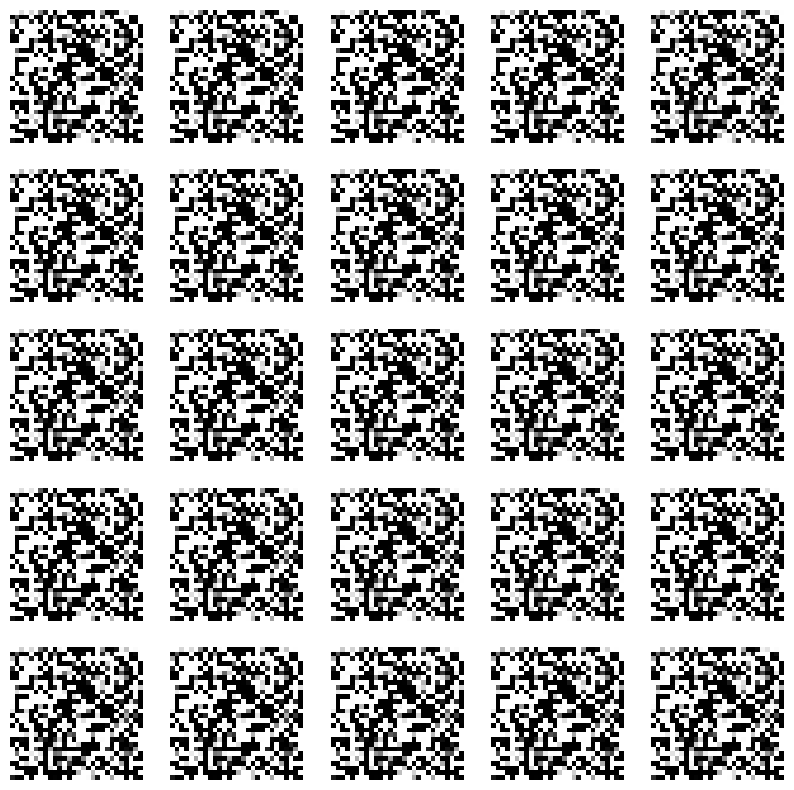

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate images
def generate_images(generator, number_of_images):
    noise = np.random.normal(0, 1, size=(number_of_images, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale images to the range [0, 1]
    return generated_images

# Generate images
images = generate_images(generator, 25)  # Generate 25 images to fill a 5x5 grid

# Plot images in a 5x5 grid
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
idx = 0
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(images[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        idx += 1
plt.show()


In [37]:
# Using pip
!pip install ipywidgets


# For Jupyter Notebook
!jupyter nbextension enable --py widgetsnbextension




Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [46]:
from pytorch_lightning.callbacks import Callback
from tqdm import tqdm

class TQDMProgressBar(Callback):
    def on_train_start(self, trainer, pl_module):
        self.bar = tqdm(desc='Training', total=trainer.num_training_batches)

    def on_train_batch_end(self, trainer, pl_module, outputs, batch, batch_idx):
        self.bar.update(1)
        self.bar.set_description(f"Epoch {trainer.current_epoch + 1}/{trainer.max_epochs}")

    def on_train_epoch_end(self, trainer, pl_module):
        self.bar.close()
        self.bar = tqdm(desc='Training', total=trainer.num_training_batches)

    def on_train_end(self, trainer, pl_module):
        self.bar.close()


In [ ]:
import torch
from torch import nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from pytorch_lightning import Trainer

# Hyperparameters and setup
latent_dim = 10
batch_size = 128
num_epochs = 3

# Image transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# MNIST dataset
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)

# Generator model
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# GAN class using PyTorch Lightning
class GAN(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.generator = Generator()
        self.discriminator = Discriminator()
        self.automatic_optimization = False

    def forward(self, z):
        return self.generator(z)

    def adversarial_loss(self, y_hat, y):
        return nn.BCELoss()(y_hat, y)

    def training_step(self, batch, batch_idx):
        imgs, _ = batch
        # Get optimizers
        opt_g, opt_d = self.optimizers()

        # Train discriminator
        z = torch.randn(imgs.size(0), latent_dim, device=self.device)
        fake_imgs = self(z)
        real = torch.ones(imgs.size(0), 1, device=self.device)
        fake = torch.zeros(imgs.size(0), 1, device=self.device)

        d_real_loss = self.adversarial_loss(self.discriminator(imgs), real)
        d_fake_loss = self.adversarial_loss(self.discriminator(fake_imgs.detach()), fake)
        d_loss = (d_real_loss + d_fake_loss) / 2

        opt_d.zero_grad()
        self.manual_backward(d_loss)
        opt_d.step()

        # Train generator
        g_loss = self.adversarial_loss(self.discriminator(fake_imgs), real)

        opt_g.zero_grad()
        self.manual_backward(g_loss)
        opt_g.step()
        
        self.log('g_loss', g_loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log('d_loss', d_loss, on_step=False, on_epoch=True, prog_bar=True)

        #self.log_dict({'g_loss': g_loss, 'd_loss': d_loss}, on_step=True, on_epoch=True)

    def configure_optimizers(self):
        opt_g = torch.optim.Adam(self.generator.parameters(), lr=0.0005, betas=(0.5, 0.999))
        opt_d = torch.optim.Adam(self.discriminator.parameters(), lr=0.0005, betas=(0.5, 0.999))
        return opt_g, opt_d

# Trainer setup
model = GAN()
trainer = Trainer(max_epochs=num_epochs)
trainer.fit(model, train_loader)


Training: |          | 0/? [00:00<?, ?it/s]

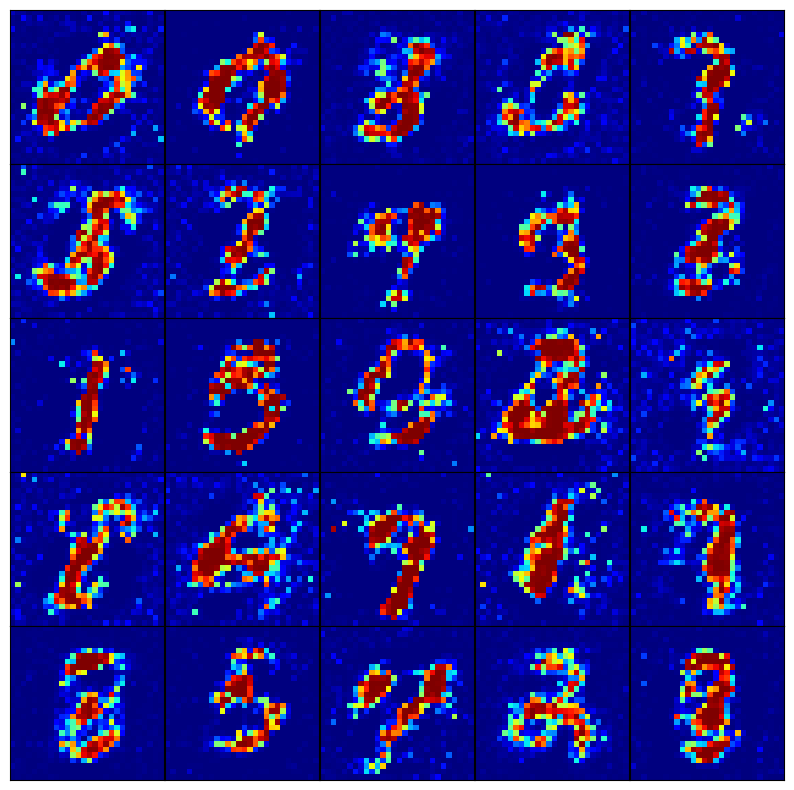

In [5]:
import torch
import matplotlib.pyplot as plt

# Assuming 'model' is your trained GAN model and it has been trained already

# Set the model to evaluation mode
model.eval()

# Generate noise
noise = torch.randn(25, latent_dim, device=model.device)  # Generate 25 samples to fill a 5x5 grid, assuming latent_dim is 100

# Generate images
with torch.no_grad():
    generated_images = model(noise).cpu().view(-1, 28, 28)  # Reshape output to 28x28 (MNIST size)

# Plotting
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                         sharey=True, sharex=True)

for ax, img in zip(axes.flatten(), generated_images):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(img, cmap='jet')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
